* 회귀(regression) : 한 변수의 평균값과 다른 변수들의 상응 값의 관계를 측정하는 통계 기법  (Oxford)  
* 회귀 모델 : 선(이나 면)을 이용해 회귀를 하는 모델
* 회귀 분석(regression analysis) : 회귀를 하는 통계학적 프로세스

* 선형 회귀(linear regression) : 선형적 관계를 회귀 분석하는 것. 또는 그로 인해 나온 모델. 머신러닝 알고리즘


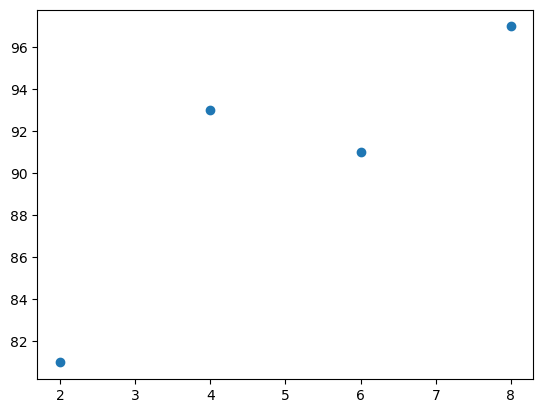

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

plt.scatter(x,y)
plt.show()

# 경사하강법
각 파라미터의 오차 조정량은, 오차 측정 시점에서의 '파라미터 변화에 따른 오차 변화량'에 학습률을 곱해서 조정한다.

이유: 파라미터가 변함에 따라 오차가 변할텐데, 오차가 변하는 방향과 반대 방향으로 파라미터를 조정하고 반대방향으로 크게 변하는 거니, 변화량과 비례해서 조정하면 된다.

파라미터에 따른 오차 변화량은, 오차 변화량을 파라미터로 편미분한 것과 같다.

그 식이 아래의 `a_diff`, `b_diff` 다.


In [2]:
def update(i):
    global a, b
    y_pred = a * x + b
    error = y - y_pred

    a_diff = (2/n) * sum(-x * (error)) #오차 식을 a에 대해 편미분
    b_diff = (2/n) * sum(-(error)) #오차 식을 b에 대해 편미분

    a = a - lr * a_diff
    b = b - lr * b_diff

    if i % 100 == 0:
      print("epoch=%.f,기울기=%.0f ,절편=%.04f" % (i, a, b))
    line.set_ydata(a * x + b)
    return line,

epoch=0,기울기=28 ,절편=5.4300


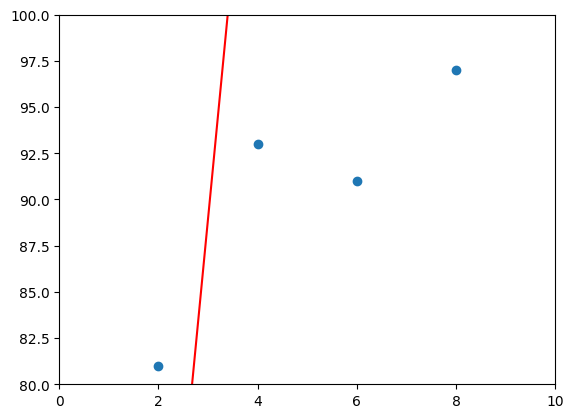

In [4]:
a=0
b=0

lr = 0.03
epochs = 501
n = len(x)

fig, ax = plt.subplots()
ax.scatter(x,y)
line, = ax.plot(x, a * x + b, 'r')

ax.set_xlim(0, 10)
ax.set_ylim(80, 100)

#animation 그리기
ani = FuncAnimation(fig, update, frames=np.arange(epochs), interval = 1)

In [5]:
# GIF로 저장
ani.save("linear_regression.gif", writer=PillowWriter(fps=120))

# Colab에서 GIF 보기
Image(filename="linear_regression.gif")

Output hidden; open in https://colab.research.google.com to view.